In [2]:
import cdsapi
c = cdsapi.Client()

In [3]:
#t2m, midnight

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'grib',
        'variable': [
            '2m_temperature',
        ],
        'year': '2020',
        'month': '01',
        'day': '01',
        'time': '00:00',
    },
    'download_t2m_midnight.grib')

2022-03-23 17:39:08,572 INFO Welcome to the CDS
2022-03-23 17:39:08,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2022-03-23 17:39:08,685 INFO Request is completed
2022-03-23 17:39:08,687 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1648056237.313923-11466-10-0dc6f5df-e06b-408d-bbe5-9b0ef7dd6b6d.grib to download_t2m_midnight.grib (5M)
2022-03-23 17:39:09,495 INFO Download rate 6.2M/s   


Result(content_length=5236320,content_type=application/x-grib,location=https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1648056237.313923-11466-10-0dc6f5df-e06b-408d-bbe5-9b0ef7dd6b6d.grib)

In [4]:
#t2m, midday

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'grib',
        'variable': [
            '2m_temperature',
        ],
        'year': '2020',
        'month': '01',
        'day': '01',
        'time': '12:00',
    },
    'download_t2m_midday.grib')

2022-03-23 17:39:26,176 INFO Welcome to the CDS
2022-03-23 17:39:26,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2022-03-23 17:39:26,234 INFO Request is queued
2022-03-23 17:39:27,287 INFO Request is completed
2022-03-23 17:39:27,288 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/adaptor.mars.internal-1648057166.3256645-6252-9-5495f7b0-a179-40cb-a8f4-4eea294eb3e4.grib to download_t2m_midday.grib (5M)
2022-03-23 17:39:28,269 INFO Download rate 5.1M/s   


Result(content_length=5236320,content_type=application/x-grib,location=https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/adaptor.mars.internal-1648057166.3256645-6252-9-5495f7b0-a179-40cb-a8f4-4eea294eb3e4.grib)

In [5]:
#skt, midnight

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'grib',
        'variable': [
            'skin_temperature',
        ],
        'year': '2020',
        'month': '01',
        'day': '01',
        'time': '00:00',
    },
    'download_skt_midnight.grib')

2022-03-23 17:40:19,116 INFO Welcome to the CDS
2022-03-23 17:40:19,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2022-03-23 17:40:19,258 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1648056190.4974632-4369-11-faeef4e1-f03e-425a-a767-737b7eb96239.grib to download_skt_midnight.grib (5M)
2022-03-23 17:40:19,971 INFO Download rate 7M/s     


Result(content_length=5236320,content_type=application/x-grib,location=https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1648056190.4974632-4369-11-faeef4e1-f03e-425a-a767-737b7eb96239.grib)

In [6]:
#skt, midday

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'grib',
        'variable': [
            'skin_temperature',
        ],
        'year': '2020',
        'month': '01',
        'day': '01',
        'time': '12:00',
    },
    'download_skt_midday.grib')

2022-03-23 17:40:39,804 INFO Welcome to the CDS
2022-03-23 17:40:39,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2022-03-23 17:40:39,863 INFO Request is queued
2022-03-23 17:40:40,915 INFO Request is completed
2022-03-23 17:40:40,916 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/adaptor.mars.internal-1648057239.9002628-12944-2-686bbb86-18b0-4e3c-b575-921b419eaa6c.grib to download_skt_midday.grib (5M)
2022-03-23 17:40:41,762 INFO Download rate 5.9M/s   


Result(content_length=5236320,content_type=application/x-grib,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/adaptor.mars.internal-1648057239.9002628-12944-2-686bbb86-18b0-4e3c-b575-921b419eaa6c.grib)

In [7]:
import xarray as xr

def load_and_join(f_t2m, f_skt):

    #Load
    ds_t2m = xr.open_dataset(f_t2m,engine='cfgrib',filter_by_keys={'typeOfLevel': 'surface'})
    ds_skt = xr.open_dataset(f_skt,engine='cfgrib',filter_by_keys={'typeOfLevel': 'surface'})
    
    #To dfs
    df_t2m = ds_t2m.to_dataframe()
    df_skt = ds_skt.to_dataframe()
    
    #join
    df = df_t2m.join(df_skt, lsuffix='_t2m', rsuffix='_skt')
    
    #Get only columns we want
    df_lite = df.dropna()[['t2m', 'skt']]
    df_lite['delta'] = df.t2m - df.skt

    #Clean up
    d = df_lite.reset_index()
    d['longitude'] = ((d.longitude + 180) % 360) - 180
    
    return d

In [8]:
df_midday = load_and_join('download_t2m_midday.grib','download_skt_midday.grib')

In [9]:
df_midnight = load_and_join('download_t2m_midnight.grib','download_skt_midnight.grib')

In [11]:

import matplotlib.pyplot as plt
        
import matplotlib.colors as mc
import matplotlib.colorbar as cb  
def plot_map(df,z,vmin,vmax,cmap,title):
    
    #Get all data as vectors
    x = df.longitude
    y = df.latitude
    z1 = df[z]
    
    #Scatter plot it
    # init the figure
    fig,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},figsize=(30, 20))

    
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
    
    
    sc = ax.scatter(x, y,
               s=1,
               c=cmap(norm(z1)),
               linewidths=1, alpha=.7
               )


    ax.set_title(title)
    plt.show()

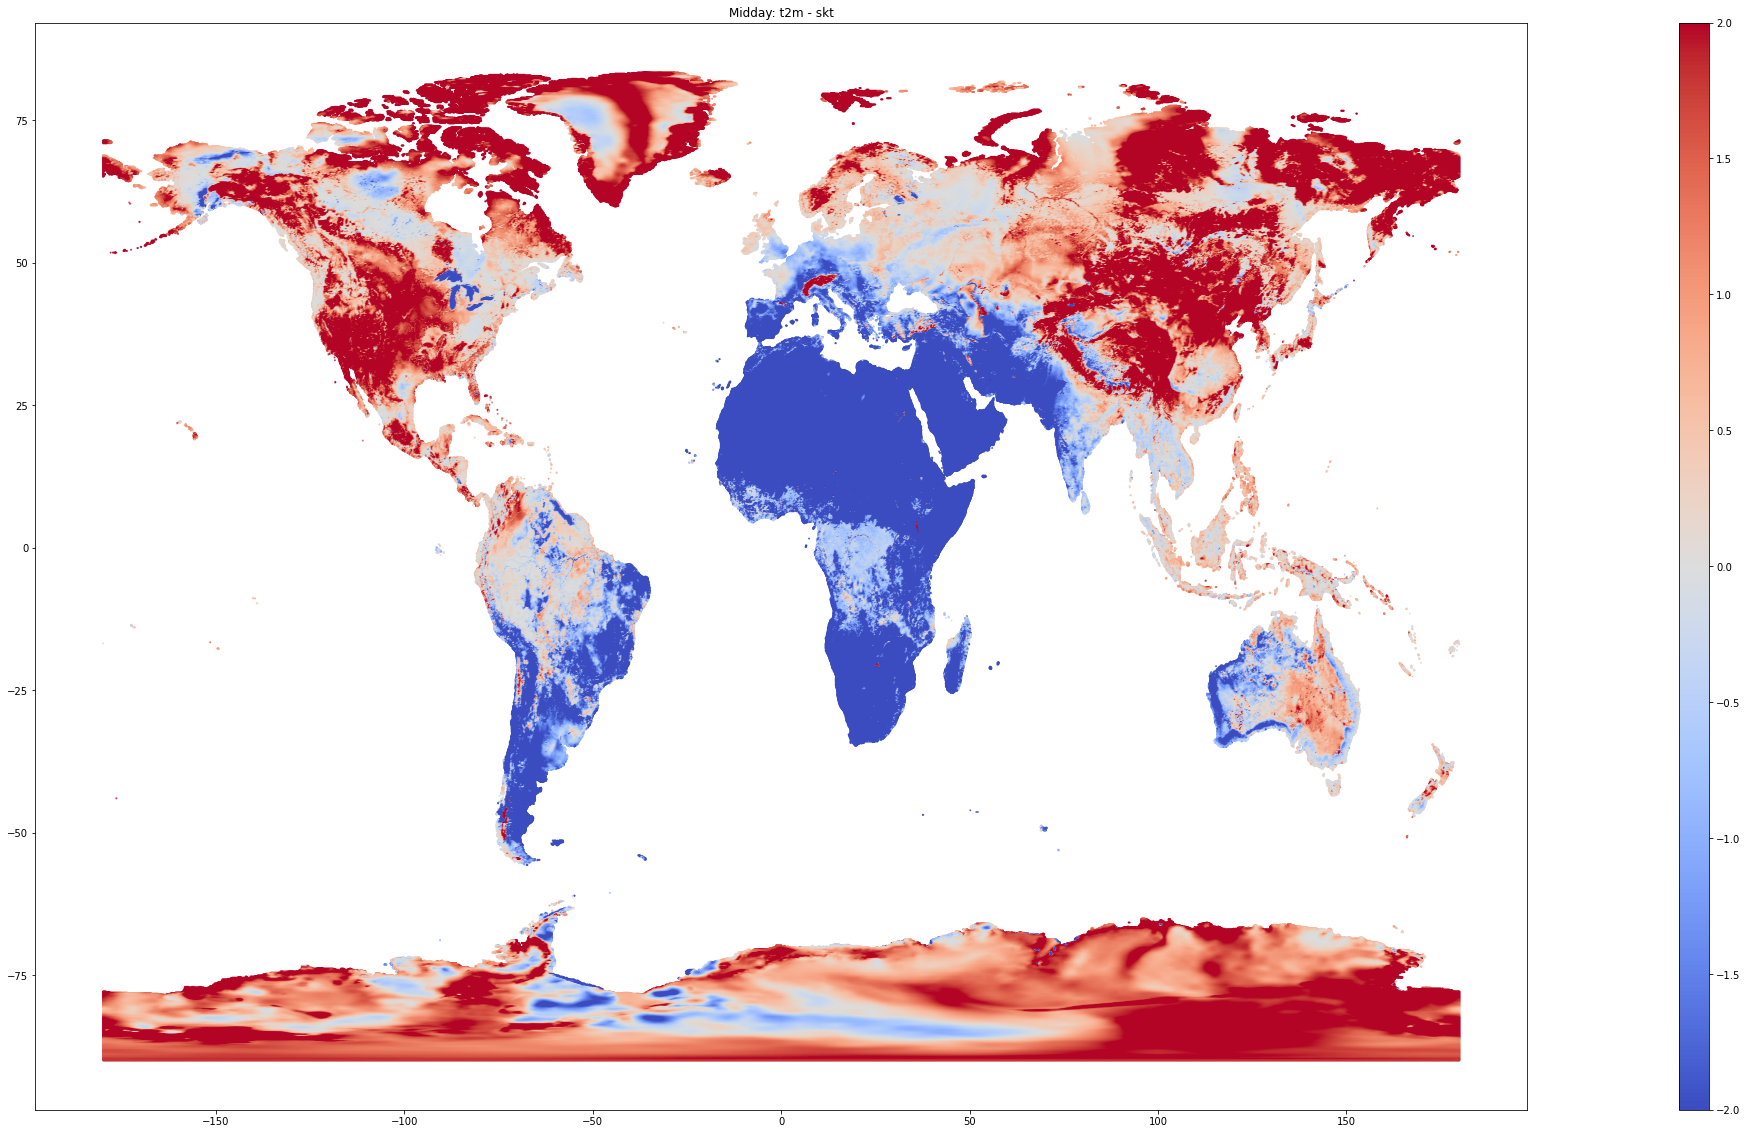

In [16]:
plot_map(df_midday,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,title='Midday: t2m - skt')

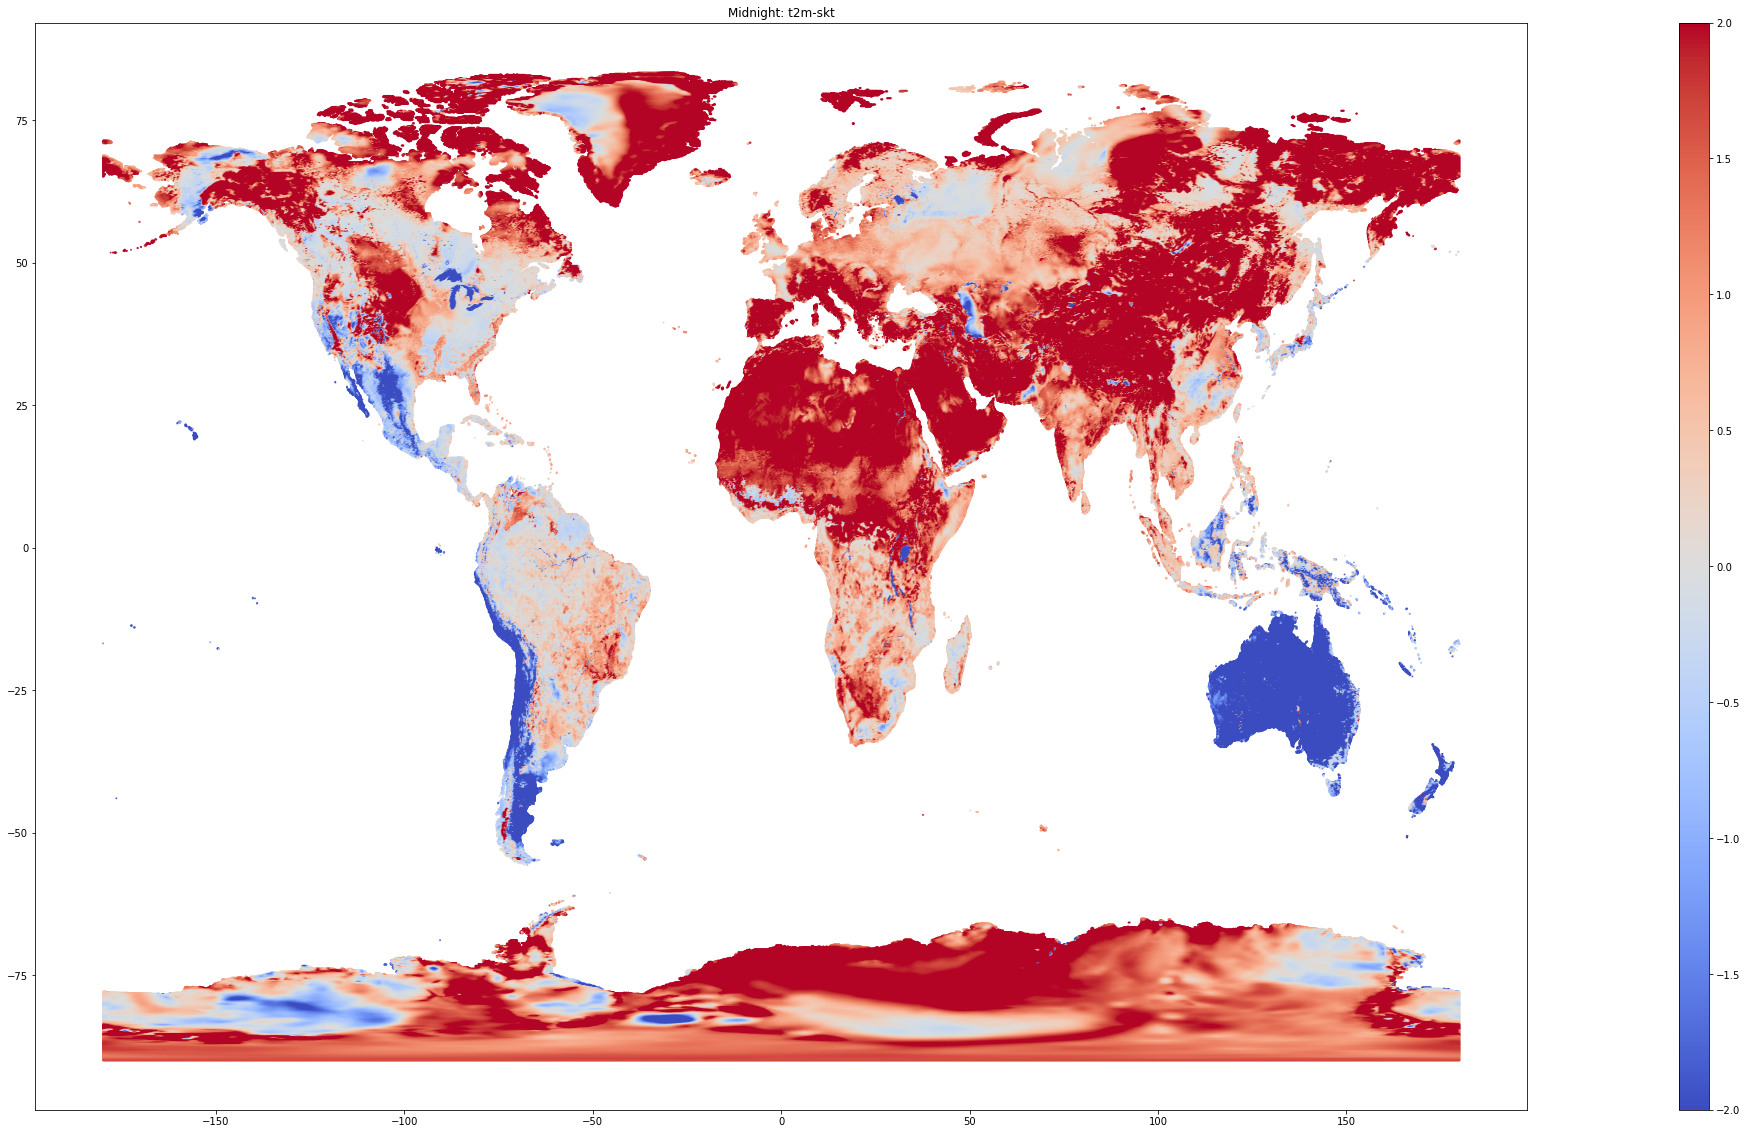

In [15]:
plot_map(df_midnight,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,title='Midnight: t2m-skt')

In [17]:
#skt, 10am

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'grib',
        'variable': [
            'skin_temperature',
        ],
        'year': '2020',
        'month': '07',
        'day': '02',
        'time': '12:00',
    },
    'skt.grib')

2022-03-23 17:58:22,242 INFO Welcome to the CDS
2022-03-23 17:58:22,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2022-03-23 17:58:22,298 INFO Request is queued
2022-03-23 17:58:23,349 INFO Request is completed
2022-03-23 17:58:23,350 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1648058302.4451876-20045-8-2d6a5a37-a01b-4755-b062-7decbed343f7.grib to skt.grib (5M)
2022-03-23 17:58:24,139 INFO Download rate 6.3M/s   


Result(content_length=5236320,content_type=application/x-grib,location=https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1648058302.4451876-20045-8-2d6a5a37-a01b-4755-b062-7decbed343f7.grib)